In [238]:
# Vincent Hong
# DA320
# Professor Spence
# November 2, 2022
# Assignment: Practical Dashboards

import json
import pymongo
import certifi
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Loading the json file that contains my secret MongoDB connection string
with open ('/Users/hong.vince/Desktop/DA320/credentials.json') as u:
    data = json.load(u)

    secret_key = data['my-secret-key']

# Connecting to the database using known good certificates
client = pymongo.MongoClient(secret_key, tlsCAFile=certifi.where())

# Fetching my database titled "DA320"
da320_database = client['DA320']

# Accessing my collections from my "DA320" database
allCollections = da320_database.list_collection_names()

In [ ]:
# Retrieving all IMDB_Pipeline_Views from the IMDB collection
cursor = da320_database["IMDB_Pipeline_View"].find()
cursor2 = da320_database["IMDB_Pipeline_Thriller_View"].find()
cursor3 = da320_database["IMDB_Pipeline_Year_View"].find()
cursor4= da320_database["IMDB_Pipeline_Director_View"].find()

# Converting the information into a Pandas dataframe
imdb = pd.DataFrame(cursor)
imdb_thriller = pd.DataFrame(cursor2)
imdb_year = pd.DataFrame(cursor3)
imdb_director = pd.DataFrame(cursor4)

# Displaying the first few records of the unfiltered dataframe (IMDB_Pipeline_View)
imdb.head()

My approach to this assignment was to use multiple Pipeline Views as you can see above. Each individual view has a $match aggregate that filters specific data corresponding to the assignment prompt. 

For instance, IMDB_Pipeline_Thriller_View filters the genres of movies to only display Thrillers. Although I did not use the raw, unfiltered Pipeline View (IMDB_Pipeline_View), I decided to include it in case I need to refer back to it in the future. 

The reason for this approach is simply because I did not know how to filter within Jupyter Notebook. I tried doing some research but I could not seem to formulate the inquiry correctly to find the relevant answers in Google, and other forums. 

Furthermore, while referring to Professor Spence's Powerpoint titled Practical Dashboards, there was a section that covers filtering using aggregations. I decided to create multiple views with each having their own filters that corresponded to the prompts listed in the assignment (also above each chart). Below is a copy of my aggregation pipeline for IMDB_Pipeline_View translated to Python 3 via MongoDB.

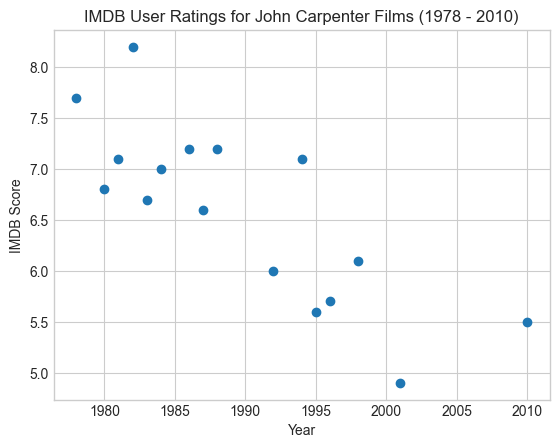

In [239]:
# Prompt: One chart that tracks the career of your favorite actor, director, producer, or a company you like.
# Source: Professor Spence's Github - https://github.com/tspence/data-analysis-class-resources/blob/main/jupyter/Basics%20of%20Plotting.ipynb 

dataset = {
    "Release_Year": imdb_director['Release_Year'],
    "User_Rating": imdb_director['User_Rating'],
}

# Plotting IMDB User Ratings of John Carpenter films over the course of his career 
plt.title('IMDB User Ratings for John Carpenter Films (1978 - 2010)')
plt.xlabel('Year')
plt.ylabel('IMDB Rating')
plt.scatter(dataset['Release_Year'], dataset['User_Rating'])
plt.show()

Analysis: There seems to be a notable decrease in quality in John Carpenter films over the years (according to IMDB Users). This scatter plot displays a moderate-strong negative correlation. 

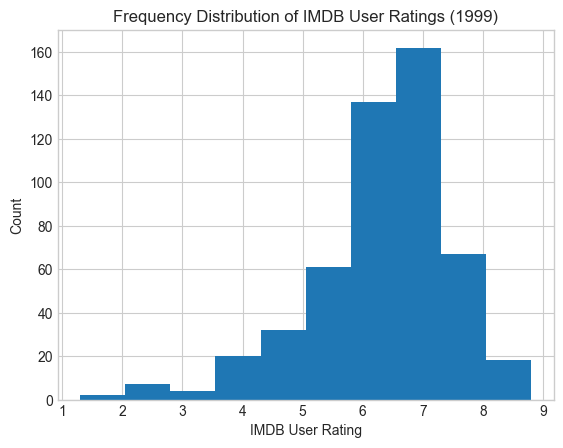

In [257]:
# Prompt: One chart that graphs movies released within a single year.
# Source: Professor Spence's Github - https://github.com/tspence/data-analysis-class-resources/blob/main/jupyter/Basics%20of%20Plotting.ipynb 
dataset = [imdb_year['User_Rating']]

# Using a Histogram to plot the IMDB User ratings of the movies released in 1999 
plt.title('Frequency Distribution of IMDB User Ratings (1999)')
plt.xlabel('IMDB User Rating')
plt.ylabel('Count')
plt.hist(dataset, bins=10)
plt.show()

Analysis: This histogram illustrates a negatively skewed distribution. I can conclude that IMDB Users generally found movies released in 1999 to be enjoyable, with the majority of users rating the films a solid 7. 

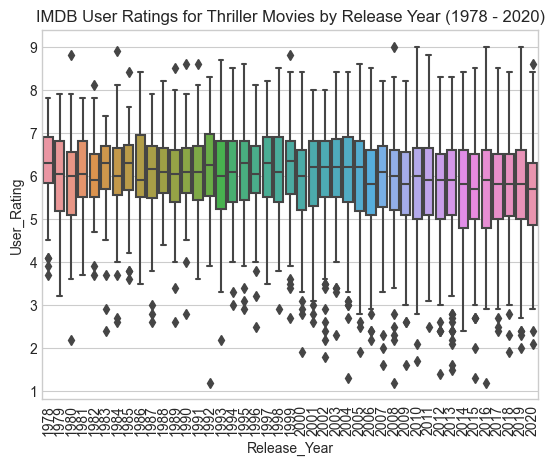

In [263]:
# Prompt: One chart that graphs a single genre of movies over time.
# Source: Professor Spence - Office Hours Notes

# Using seaborn module to create a box plot for IMDB User ratings for Thriller movies over time
boxplot_chart = sns.boxplot(data = imdb_thriller, x = imdb_thriller["Release_Year"], y = imdb_thriller["User_Rating"])
boxplot_chart.set_title("IMDB User Ratings for Thriller Movies by Release Year (1978 - 2020)")
for item in boxplot_chart.get_xticklabels():
    item.set_rotation(90)

Analysis: This box and whispers plot seems to illustrate a relatively normal distribution of IMDB User Ratings over the years (for the most part). I can conclude that the quality of thriller movies have been somewhat consistant over the years, in terms IMDB User opinions. 